## Task 4.2.1 - ICA

Implement Independent Component Analysis (ICA) from scratch using only `NumPy`. Feel free to use the `FastICA` algorithm as reference. You may check the tutorial slides for a breakdown of the algorithm.<br><br>
You are welcome to use `sklearn`'s PCA implementation for data whitening.

* Implement the ICA given the class structure below. **(RESULT)**
* Test your implementation using test signals (e.g. sinewave, squarewave like the lecture example) and plot the signal waves before and after ICA. **(RESULT)**

In [143]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Optional, Callable, Tuple

# Build ICA

In [144]:
class ICA:
    """
    Independent Component Analysis (ICA) using the FastICA algorithm.

    ICA is a computational method for separating a multivariate signal into
    additive subcomponents, assuming that the subcomponents are statistically
    independent and non-Gaussian.

    """

    def __init__(self, tol=1e-8, n_iterations=100):
        self.tol = tol
        self.n_iterations = n_iterations

        # TODO: Implement this function..


    def fit(self,X):
        """
        Fit the ICA model to the data.
        """
        n = X.shape[1]
        X = X - np.mean(X, axis=1, keepdims=True)
        cov_matrix =  (X@ X.T)/n
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        diagonal_eigen = np.diag(1/np.sqrt(eigenvalues))
        self.WhiteningMatrix = eigenvectors @ (diagonal_eigen @ eigenvectors.T)
        self.x_white =  self.WhiteningMatrix @ X

        # self.W=[]
        self.W = []
        for i in range(X.shape[0]):
          w = np.random.randn(X.shape[0], 1)
          w_norm = np.linalg.norm(w)
          w = w / w_norm

          k=0

          while (k<self.n_iterations) and ((k==0) or (np.abs(1 - np.abs((w.T @ wold).item())) > self.tol)):
            wold=w.copy()
            WX= w.T@self.x_white
            gu= WX**3
            diffgu= 3*(WX**2)
            firstterm= (self.x_white*gu).mean(axis=1, keepdims=True)
            secondterm= diffgu.mean()
            w=firstterm-(secondterm * w)
            w_norm = np.linalg.norm(w)
            w = w / w_norm
            if i !=0:
              # print("i entered")
              w =  w - np.array(self.W).T @ (np.array(self.W) @ w)
              # print(w.shape)
              w_norm = np.linalg.norm(w)
              w = w / w_norm
            k+=1

          self.W.append(w.squeeze())



        # TODO: Implement this function..

    def transform(self,X):

        S = np.array(self.W) @ self.x_white
        return S
        """
        Apply the unmixing matrix to the data.
        """

        # TODO: Implement this function..

    def inverse_transform(self,S):

        A = np.linalg.inv(np.array(self.W))
        unwhiten = np.linalg.inv(self.WhiteningMatrix)

        X_rec = unwhiten @ A @ S
        return X_rec




# Generating signals and mixing them

In [145]:
def generate_test_signals(n_samples: int = 2000, random_state: int = 42):
    """
    Generate test signals for ICA demonstration.
    """
    t = np.linspace(0, 8 * np.pi, n_samples)
    wave1 = np.sin(2 * t)
    wave2 = square_wave = np.sign(np.sin(3* t))
    Sourcematrix = np.vstack([wave1, wave2])
    np.random.seed(random_state)
    A = np.random.rand(Sourcematrix.shape[0], Sourcematrix.shape[0])
    X = A @ Sourcematrix

    return Sourcematrix, X,t


In [146]:
source, mixture,t= generate_test_signals(n_samples=2000)


#Plot the original independent sources

Text(0.5, 0, 'time')

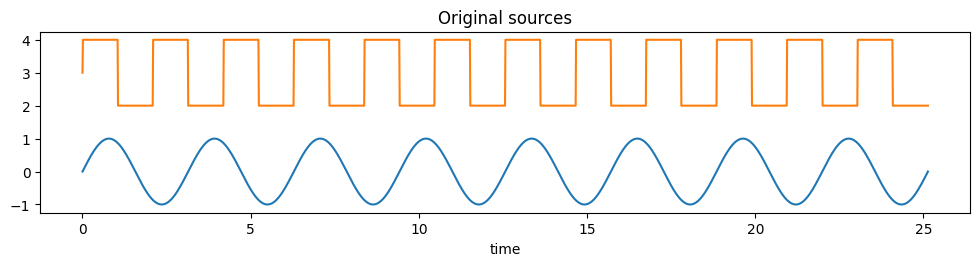

In [147]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.title("Original sources")
for i in range(source.shape[0]):
    plt.plot(t, source[i] + 3*i)
plt.xlabel("time")

# Plot the original mixtures

Text(0.5, 0, 'time')

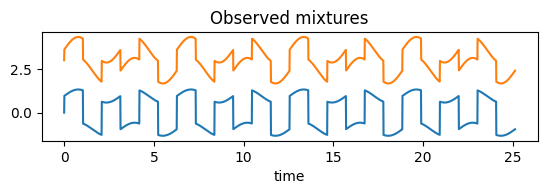

In [148]:
plt.subplot(3, 1, 2)
plt.title("Observed mixtures")
for i in range(mixture.shape[0]):
    plt.plot(t, mixture[i] + 3*i)
plt.xlabel("time")

# Run our implementation

In [149]:
ICA_ = ICA()
ICA_.fit(mixture)
S_ICA = ICA_.transform(mixture)
# print(S_ICA.shape)

# Plot the recovered sources

Text(0.5, 0, 'time')

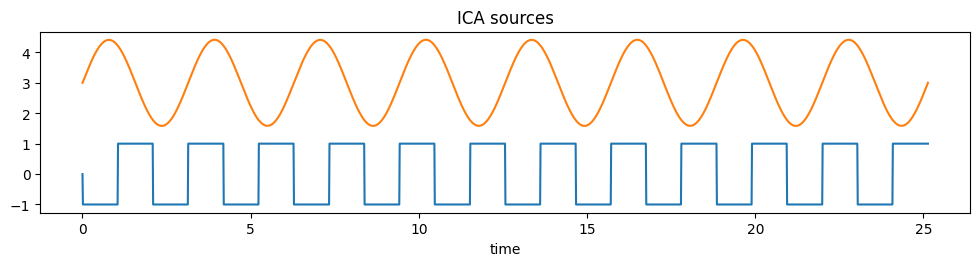

In [150]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.title("ICA sources")
for i in range(S_ICA.shape[0]):
    plt.plot(t, S_ICA[i] + 3*i)
plt.xlabel("time")

As you can see, it matches the original sources

# Test transforming the sources back to mixtures

In [151]:
X_ICA = ICA_.inverse_transform(S_ICA)

Text(0.5, 0, 'time')

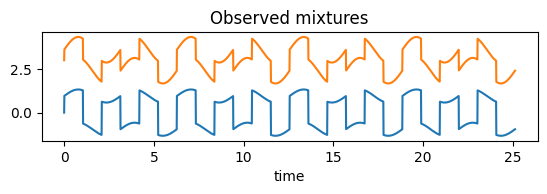

In [152]:
plt.subplot(3, 1, 2)
plt.title("Observed mixtures")
for i in range(X_ICA.shape[0]):
    plt.plot(t, X_ICA[i] + 3*i)
plt.xlabel("time")

As seen here it matches the original mixture too

## Task 4.2.2 - ICA on IRIS Dataset

* Use your ICA class on the `IRIS` dataset. **(RESULT)**
* Visualize independent input features using scatter plots. You should be able to obtain these with the fitted unmixing matrix. **(RESULT)**



In [153]:
from sklearn.datasets import load_iris

In [154]:
iris = load_iris()
x = iris.data
# y = iris.target


# Run our implementation on iris dataset

In [155]:
ICA_ = ICA()
ICA_.fit(x.T)
S_ICA = ICA_.transform(x.T)

Here we transposed the x, because the ICA expects a mixture of shape(features, samples)

#Visualised every component against the other

Text(0, 0.5, 'ICA 2')

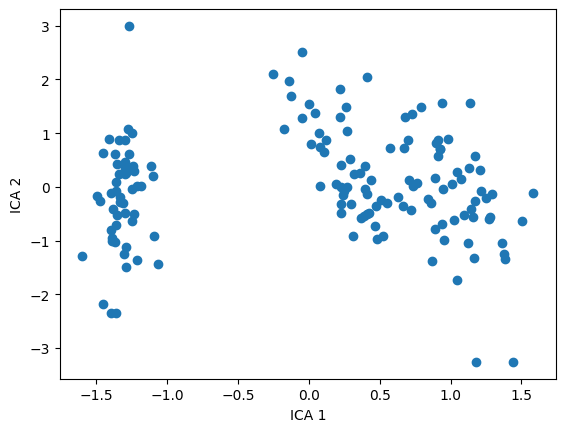

In [156]:
plt.scatter(S_ICA[0, :], S_ICA[1,:])
plt.xlabel("ICA 1")
plt.ylabel("ICA 2")


Text(0, 0.5, 'ICA 3')

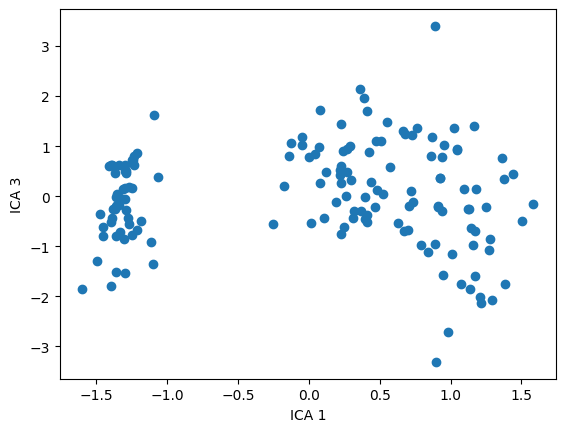

In [157]:
plt.scatter(S_ICA[0,:], S_ICA[2,:])
plt.xlabel("ICA 1")
plt.ylabel("ICA 3")

Text(0, 0.5, 'ICA 4')

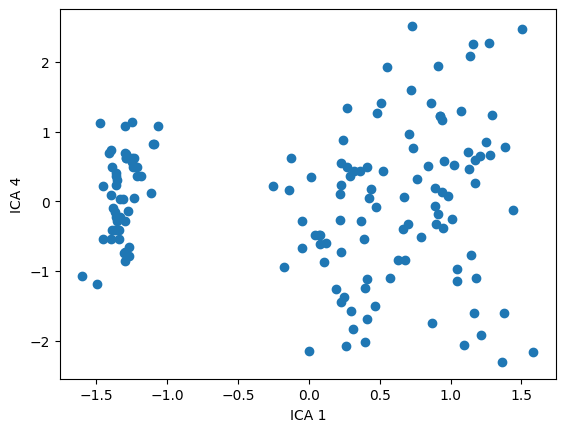

In [158]:
plt.scatter(S_ICA[0,:], S_ICA[3,:])
plt.xlabel("ICA 1")
plt.ylabel("ICA 4")

Text(0, 0.5, 'ICA 3')

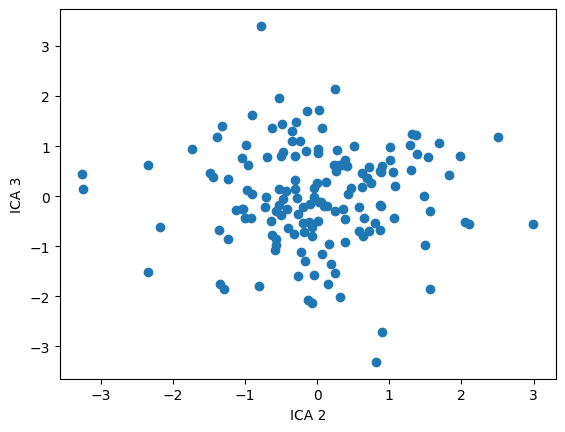

In [159]:
plt.scatter(S_ICA[1,:], S_ICA[2,:])
plt.xlabel("ICA 2")
plt.ylabel("ICA 3")

Text(0, 0.5, 'ICA 4')

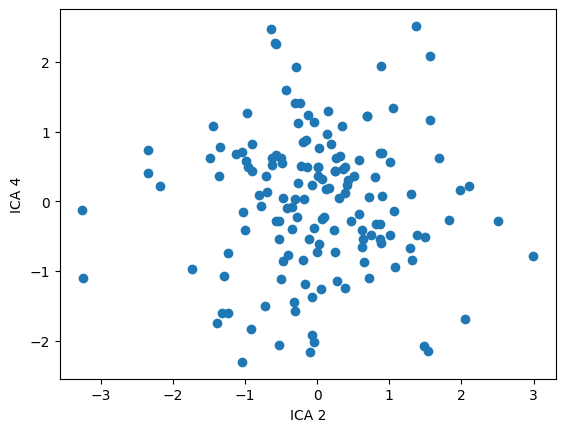

In [160]:
plt.scatter(S_ICA[1,:], S_ICA[3,:])
plt.xlabel("ICA 2")
plt.ylabel("ICA 4")

Text(0, 0.5, 'ICA 4')

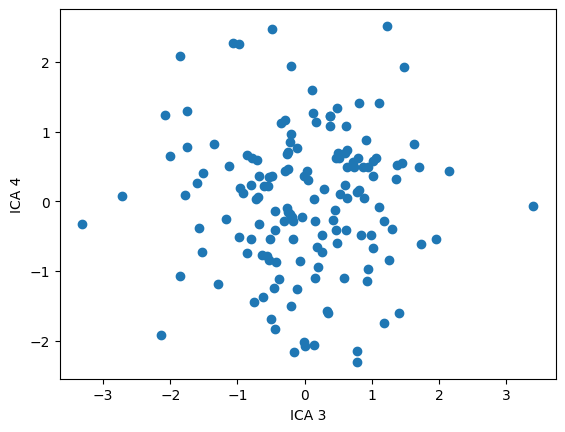

In [161]:
plt.scatter(S_ICA[2,:], S_ICA[3,:])
plt.xlabel("ICA 3")
plt.ylabel("ICA 4")

## Congratz, you made it! :)